In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs,make_moons,make_circles
from sklearn import cluster
from sklearn import mixture
from sklearn.metrics import adjusted_rand_score
import dbscan_lab_helper as helper
import seaborn as sns
import pandas as pd
%matplotlib inline

In [70]:
X, y = make_blobs(n_samples=1000,
                             cluster_std=[5, 1, 0.5],
                             random_state=3)

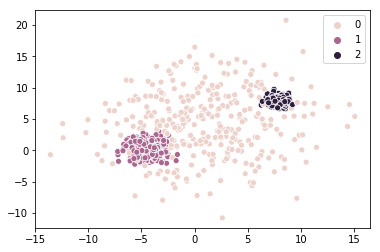

In [28]:
sns.scatterplot(X[:,0],X[:,1],hue=y)

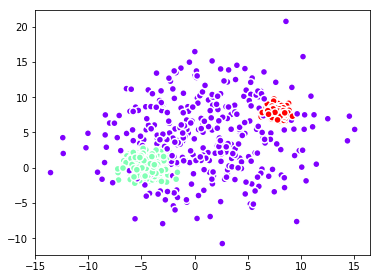

In [45]:
plt.figure(figsize=(6,4.5))
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='white', lw=1.5, s=50, cmap=plt.get_cmap('rainbow'))
plt.show()

In [71]:
kmeans_3 = KMeans(3,init='k-means++')
kmeans_3_labels = kmeans_3.fit_predict(X)

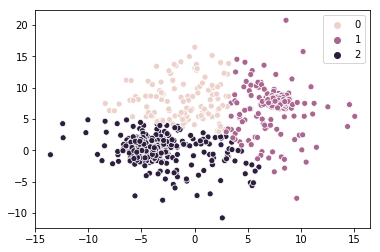

In [37]:
sns.scatterplot(X[:,0], X[:,1], hue=kmeans_3_labels)

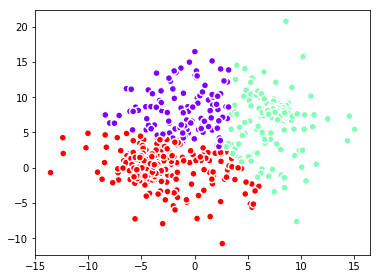

In [51]:
plt.figure( figsize=(6,4.5))
plt.scatter(X[:,0], X[:,1], c=kmeans_3_labels, edgecolor='white', lw=1.5, s=50, cmap=plt.get_cmap('rainbow'))
plt.show()

In [72]:
gmm_3 = mixture.GaussianMixture(n_components=3)
gmm_3_labels = gmm_3.fit_predict(X)

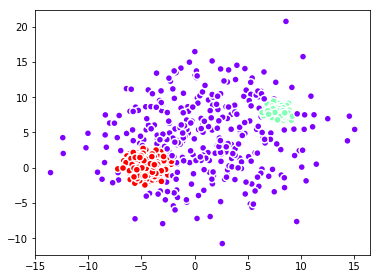

In [68]:
plt.figure( figsize=(6,4.5))
plt.scatter(X[:,0], X[:,1], c=gmm_3_labels, edgecolor='white', lw=1.5, s=50, cmap=plt.get_cmap('rainbow'))
plt.show()

In [73]:
kmeans_ar_score = adjusted_rand_score(y, kmeans_3_labels)
gmm_ar_score = adjusted_rand_score(y, gmm_3_labels)

In [74]:
print('kmeans_ar_score: ',kmeans_ar_score)
print('gmm_ar_score: ',gmm_ar_score)

kmeans_ar_score:  0.5361739479175923
gmm_ar_score:  0.9129496875073981


In [80]:
data, y = make_moons(n_samples=200,noise=0.09)

In [81]:
gmm_2 = mixture.GaussianMixture(n_components=2)
gmm_2_labels = gmm_2.fit_predict(data)

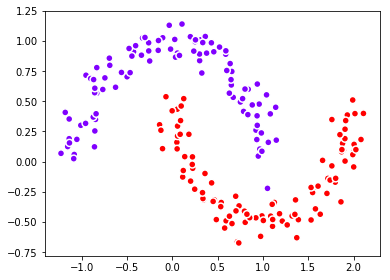

In [82]:
plt.figure(figsize=(6,4.5))
plt.scatter(data[:,0], data[:,1], c=y, edgecolor='white', lw=1.5, s=50, cmap=plt.get_cmap('rainbow'))
plt.show()

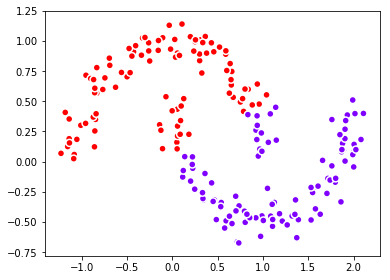

In [83]:
plt.figure( figsize=(6,4.5))
plt.scatter(data[:,0], data[:,1], c=gmm_2_labels, edgecolor='white', lw=1.5, s=50, cmap=plt.get_cmap('rainbow'))
plt.show()

In [85]:
gmm_ar_score = adjusted_rand_score(y, gmm_2_labels)
print('gmm_ar_score: ',gmm_ar_score)

gmm_ar_score:  0.5015957062647948


In [86]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


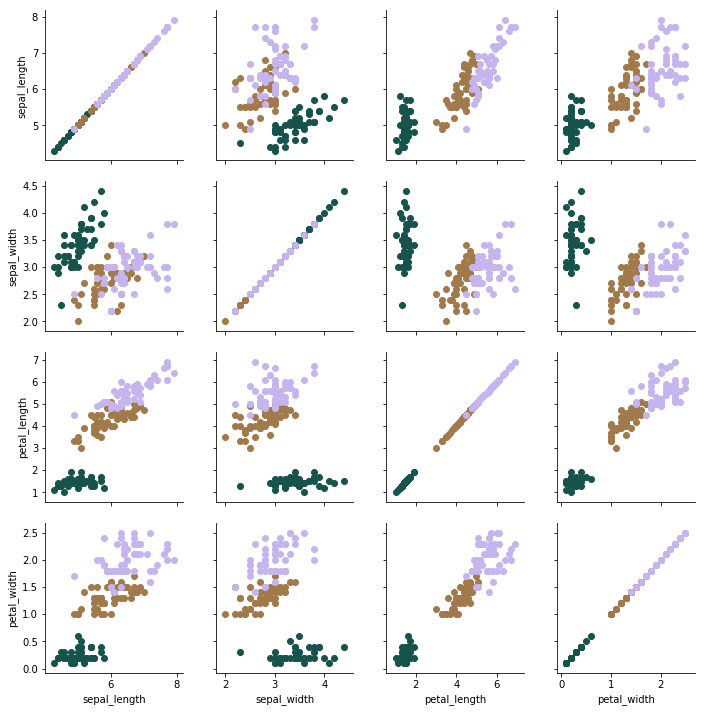

In [87]:
g = sns.PairGrid(iris, hue="species", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

In [88]:
kmeans_3 = KMeans(3,init='k-means++')
kmeans_3_labels = kmeans_3.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

In [95]:
iris['kmeans_pred'] = kmeans_3_labels

In [96]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,kmeans_pred
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


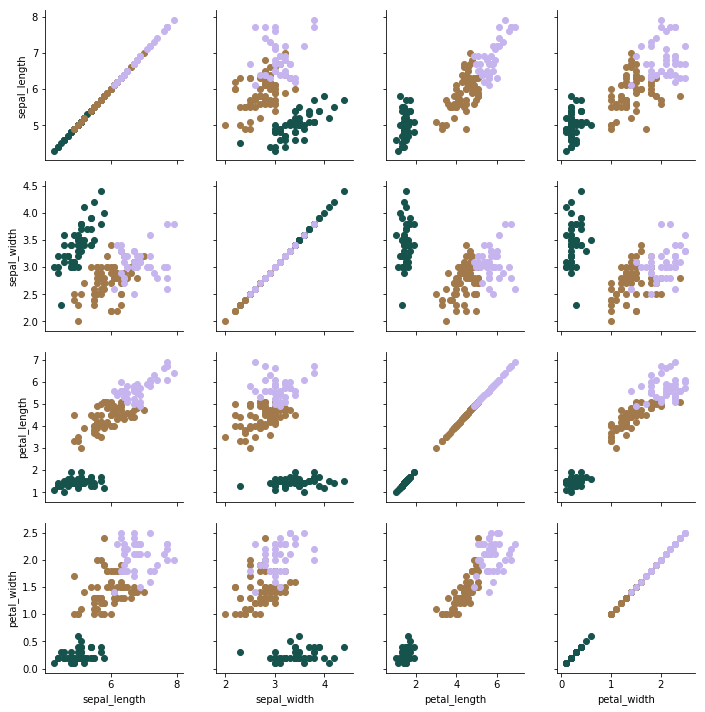

In [97]:
g = sns.PairGrid(iris, hue="kmeans_pred", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

In [98]:
kmeans_ar_score = adjusted_rand_score(iris['species'], iris['kmeans_pred'])
kmeans_ar_score

0.7302382722834697

In [101]:
gmm_2 = mixture.GaussianMixture(n_components=3)
gmm_2_labels = gmm_2.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

In [103]:
iris['gmm_pred'] = gmm_2_labels

In [104]:
gmm_ar_score = adjusted_rand_score(iris['species'], iris['gmm_pred'])
gmm_ar_score

0.9038742317748124

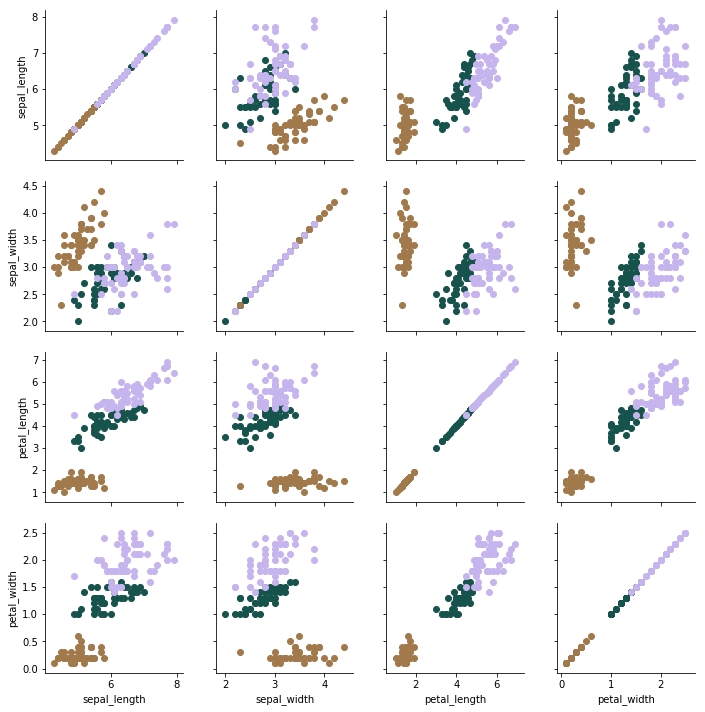

In [105]:
g = sns.PairGrid(iris, hue="gmm_pred", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()